In [45]:
from fastsst import SingularSpectrumTransformation

from Core2dsp import PLOT_Jiayu
from NRSR_Tutorial.dsp import scg_simulate, sst
import numpy as np

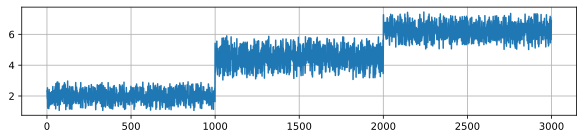

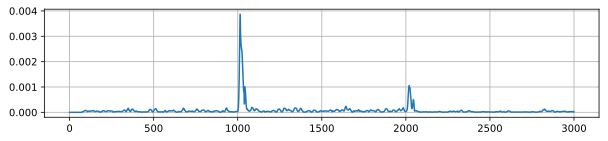

In [57]:
x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
x = np.hstack([x0, x1, x2])
x +=  + np.random.rand(x.size)

# 对于这种变化非常大的曲线，效果非常好
score = sst(x, win_length=30, n_components=2)
PLOT_Jiayu.plot(x, figsize=(10, 2), show=True)
PLOT_Jiayu.plot(score, figsize=(10, 2))

100%|██████████| 1/1 [00:00<00:00, 180.33it/s]

hr: 93 rr: 28 sp: 118 dp: 81


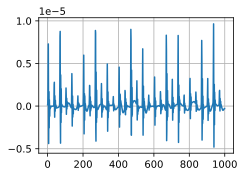

In [44]:

scg_label = scg_simulate(n_echo=0)
scg, label = scg_label[:1000], scg_label[-6:]
PLOT_Jiayu.plot(scg)

65


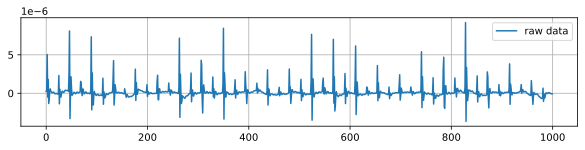

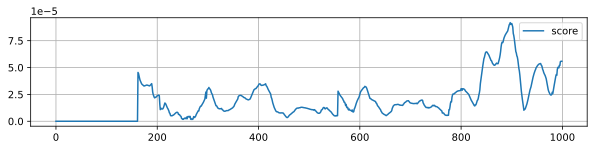

In [27]:



window = int(6000 * 1.5 // label[2])
print(window)
score = sst(scg, win_length=window)
PLOT_Jiayu.plot(scg, legend=['raw data'], figsize=(10, 2), show=True)
PLOT_Jiayu.plot(score, legend=['score'], figsize=(10, 2))

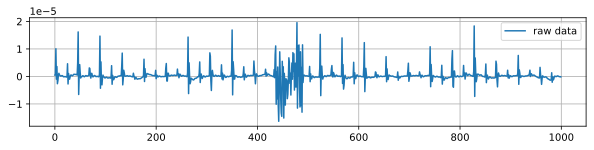

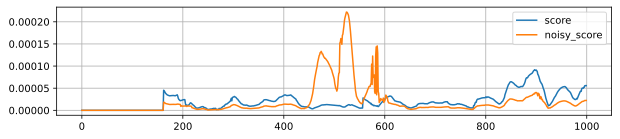

In [31]:
# 使用SST对信号进行Anomaly Detection，效果并不稳定，有时好有时坏

from NRSR_Tutorial.dsp import add_burst_noise

noisy_scg = scg +  add_burst_noise(scg, noise_amplitude=8, burst_num_max=1, burst_durations=[50, 100], show=False)

noisy_score = sst(noisy_scg, win_length=window)


PLOT_Jiayu.plot(noisy_scg, legend=['raw data'], figsize=(10, 2), show=True)
PLOT_Jiayu.plot([score, noisy_score], legend=['score', 'noisy_score'], figsize=(10, 2))

100%|██████████| 1/1 [00:00<00:00, 247.67it/s]

hr: 108 rr: 17 sp: 93 dp: 92


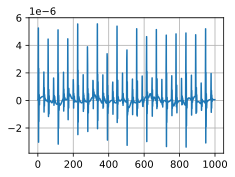

In [41]:
# 对于没有呼吸的心跳信号，用于巨大噪声的检测还是靠谱的
scg_label_NoRR = scg_simulate(add_respiratory=False, n_echo=0)
scg_NoRR, label_NoRR = scg_label_NoRR[:1000], scg_label_NoRR[-6:]
PLOT_Jiayu.plot(scg_NoRR)

55


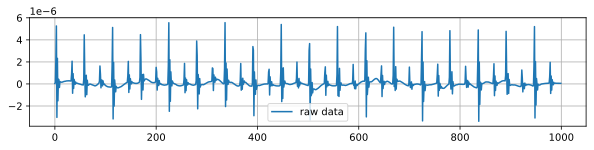

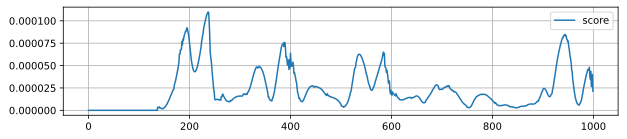

In [42]:
window_NoRR = int(6000  // label_NoRR[2])
print(window_NoRR)
score_NoRR = sst(scg_NoRR, win_length=window_NoRR)
PLOT_Jiayu.plot(scg_NoRR, legend=['raw data'], figsize=(10, 2), show=True)
PLOT_Jiayu.plot(score_NoRR, legend=['score'], figsize=(10, 2))

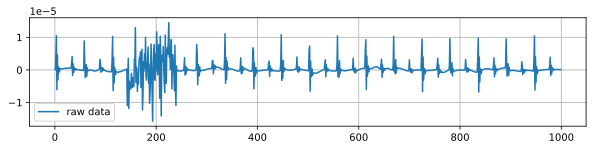

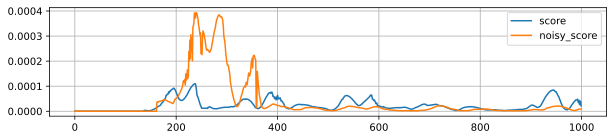

In [55]:
noisy_scg_NoRR = scg_NoRR +  add_burst_noise(scg_NoRR, noise_amplitude=8, burst_num_max=1, burst_durations=[50, 100], show=False)

noisy_score_NoRR = sst(noisy_scg_NoRR, win_length=window, n_components=3)
PLOT_Jiayu.plot(noisy_scg_NoRR, legend=['raw data'], figsize=(10, 2), show=True)
PLOT_Jiayu.plot([score_NoRR, noisy_score_NoRR], legend=['score', 'noisy_score'], figsize=(10, 2))